In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import locale
from itertools import combinations

locale.setlocale(locale.LC_NUMERIC, 'cs_CZ')

dataCsv = pd.read_csv("data.csv")

def calculate_length(row):
    return np.sqrt(row['X']**2 + row['Y']**2 + row['Z']**2)

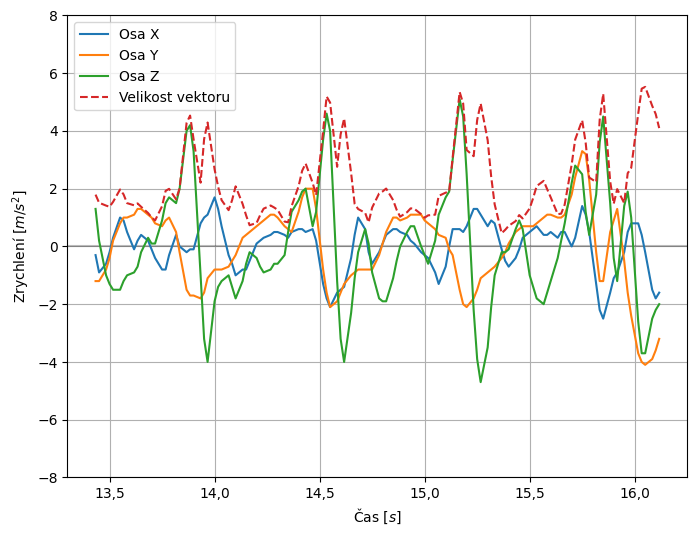

In [58]:
df = pd.DataFrame(json.loads(dataCsv.iloc[36]["LinearAccelerationSensor"]))

df["A"] = df.apply(lambda row: calculate_length(row), axis=1)

first_t = df["T"].iloc[0]

df["T"] -= first_t
df["T"] /= 1000

df.set_index("T", inplace=True)

subset_df = df.iloc[600:721]

# df["A"] = df[["Z"]].sum(axis=1)

# Plotting XYZ data
plt.figure(figsize=(8, 6))

# Setting the font family to a LaTeX-like font
plt.rcdefaults()

plt.axhline(y=0, color='black', alpha=0.25)

# Plotting X, Y, and Z columns
for col, label in zip(['X', 'Y', 'Z', 'A'], ["Osa X", "Osa Y", "Osa Z", "Velikost vektoru"]):
    if (col == 'A'):
        plt.plot(subset_df.index, subset_df[col], label=label, linestyle='--')
    else:
        plt.plot(subset_df.index, subset_df[col], label=label)

plt.xlabel('Čas [$s$]')
plt.ylabel('Zrychlení [$m/s^2$]')
plt.legend()
plt.grid(True)
ax = plt.gca()
ax.set_ylim(-8, 8)
plt.ticklabel_format(useLocale=True, style='plain', axis='x')
plt.savefig("linearAcceleration.pdf", format="pdf", bbox_inches="tight")
plt.show()

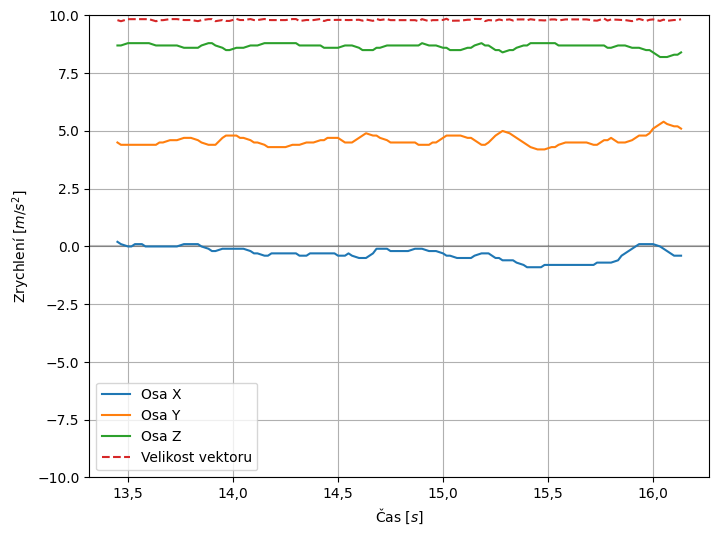

In [63]:
df = pd.DataFrame(json.loads(dataCsv.iloc[36]["GravitySensor"]))

df["A"] = df.apply(lambda row: calculate_length(row), axis=1)

first_t = df["T"].iloc[0]

df["T"] -= first_t
df["T"] /= 1000

df.set_index("T", inplace=True)

subset_df = df.iloc[600:721]

# df["A"] = df[["Z"]].sum(axis=1)

# Plotting XYZ data
plt.figure(figsize=(8, 6))

# Setting the font family to a LaTeX-like font
plt.rcdefaults()

plt.axhline(y=0, color='black', alpha=0.25)

# Plotting X, Y, and Z columns
for col, label in zip(['X', 'Y', 'Z', 'A'], ["Osa X", "Osa Y", "Osa Z", "Velikost vektoru"]):
    if (col == 'A'):
        plt.plot(subset_df.index, subset_df[col], label=label, linestyle='--')
    else:
        plt.plot(subset_df.index, subset_df[col], label=label)

plt.xlabel('Čas [$s$]')
plt.ylabel('Zrychlení [$m/s^2$]')
plt.legend()
plt.grid(True)
ax = plt.gca()
ax.set_ylim(-10, 10)
plt.ticklabel_format(useLocale=True, style='plain', axis='x')
plt.savefig("gravitySensor.pdf", format="pdf", bbox_inches="tight")
plt.show()

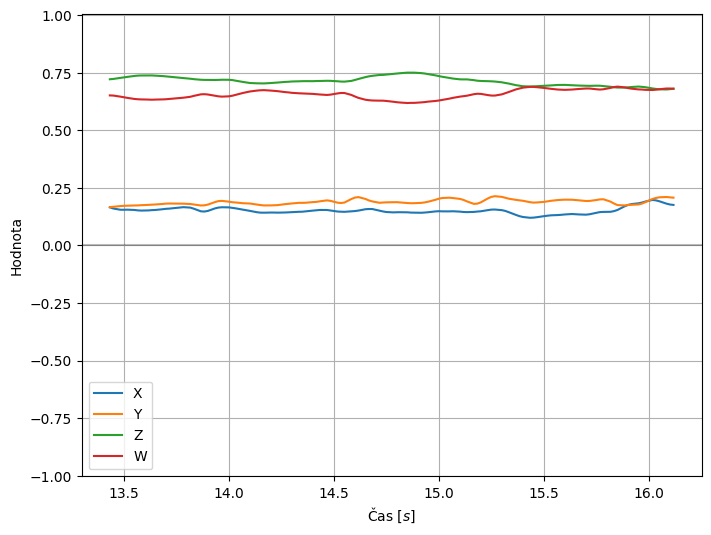

In [47]:
df = pd.DataFrame(json.loads(dataCsv.iloc[36]["RelativeOrientationSensor"]))

first_t = df["T"].iloc[0]

df["T"] -= first_t
df["T"] /= 1000

df.set_index("T", inplace=True)

subset_df = df.iloc[600:721]

# df["A"] = df[["Z"]].sum(axis=1)

# Plotting XYZ data
plt.figure(figsize=(8, 6))

plt.axhline(y=0, color='black', alpha=0.25)

# Plotting X, Y, and Z columns
for col, label in zip(['X', 'Y', 'Z', 'W'], ["X", "Y", "Z", "W"]):
    plt.plot(subset_df.index, subset_df[col], label=label)

plt.xlabel('Čas [$s$]')
plt.ylabel('Hodnota')
plt.legend()
plt.grid(True)
ax = plt.gca()
ax.set_ylim(-1.003, 1.003)
plt.savefig("relativeOrientation.pdf", format="pdf", bbox_inches="tight")
plt.show()

# df['dX'] = df['X'].diff().abs()
# df['dY'] = df['Y'].diff().abs()
# df['dZ'] = df['Z'].diff().abs()
# df['dW'] = df['W'].diff().abs()

# print(df[df['dX'] > 0]['dX'].min())
# print(df[df['dY'] > 0]['dY'].min())
# print(df[df['dZ'] > 0]['dZ'].min())
# print(df[df['dW'] > 0]['dW'].min())

# Calculate all pairwise absolute differences
# diffs = [abs(a - b) for a, b in combinations(df['W'], 2) if abs(a - b) > 0]

# Find the smallest difference
# min(diffs)

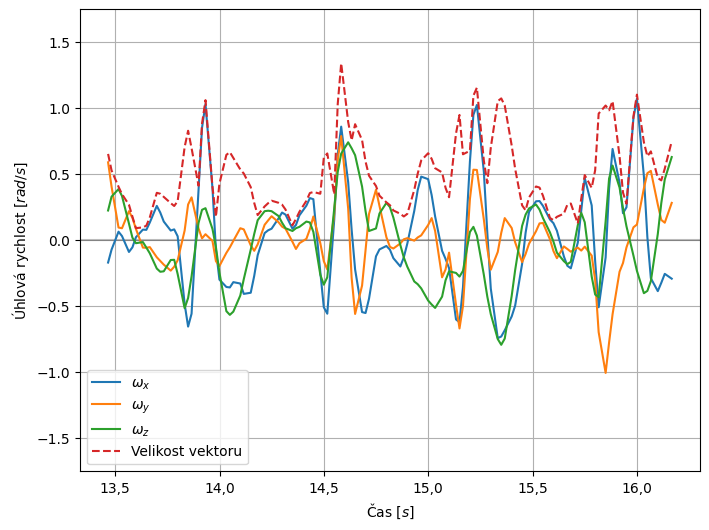

In [60]:
df = pd.DataFrame(json.loads(dataCsv.iloc[36]["Gyroscope"]))

df["A"] = df.apply(lambda row: calculate_length(row), axis=1)

first_t = df["T"].iloc[0]

df["T"] -= first_t
df["T"] /= 1000

df.set_index("T", inplace=True)

subset_df = df.iloc[600:721]

# df["A"] = df[["Z"]].sum(axis=1)

# Plotting XYZ data
plt.figure(figsize=(8, 6))

# Setting the font family to a LaTeX-like font
plt.rcdefaults()

plt.axhline(y=0, color='black', alpha=0.25)

# Plotting X, Y, and Z columns
for col, label in zip(['X', 'Y', 'Z', 'A'], ["$ω_x$", "$ω_y$", "$ω_z$", "Velikost vektoru"]):
    if (col == 'A'):
        plt.plot(subset_df.index, subset_df[col], label=label, linestyle='--')
    else:
        plt.plot(subset_df.index, subset_df[col], label=label)

plt.xlabel('Čas [$s$]')
plt.ylabel('Úhlová rychlost [$rad/s$]')
plt.legend()
plt.grid(True)
ax = plt.gca()
ax.set_ylim(-1.75, 1.75)
plt.ticklabel_format(useLocale=True, style='plain', axis='x')
plt.savefig("gyroscope.pdf", format="pdf", bbox_inches="tight")
plt.show()

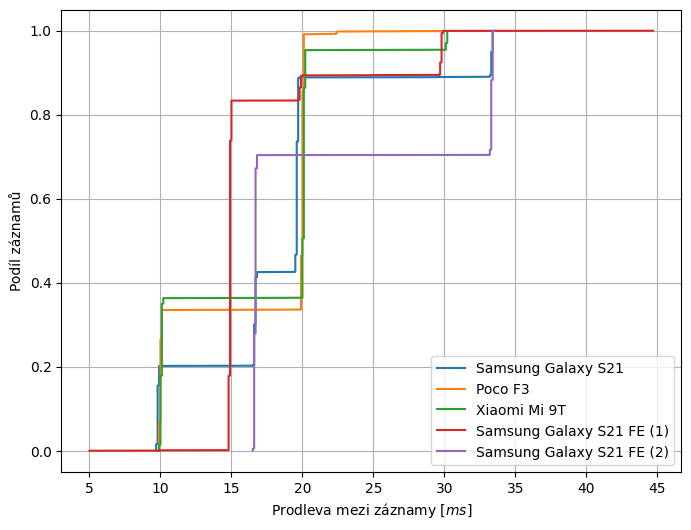

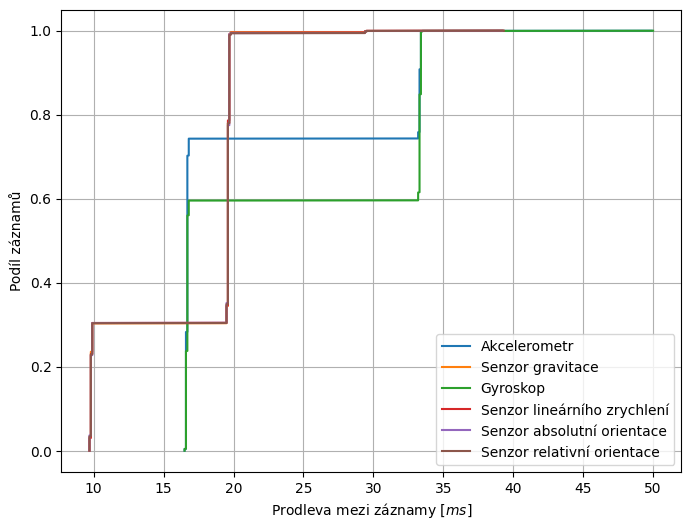

In [209]:
sensors = ["Accelerometer","GravitySensor","Gyroscope","LinearAccelerationSensor","AbsoluteOrientationSensor","RelativeOrientationSensor"]
sensorNames = ["Akcelerometr","Senzor gravitace","Gyroskop","Senzor lineárního zrychlení","Senzor absolutní orientace","Senzor relativní orientace"]
readings = [18, 4, 12, 1, 36]
phones = ["Samsung Galaxy S21", "Poco F3", "Xiaomi Mi 9T", "Samsung Galaxy S21 FE (1)", "Samsung Galaxy S21 FE (2)"]

differences = dict()

for i in range(len(readings)):
    differences[phones[i]] = pd.DataFrame()
    for sensor in sensors:
        differences[phones[i]][sensor] = (pd.DataFrame(json.loads(dataCsv.iloc[readings[i]][sensor])))["T"].diff().dropna()
    differences[phones[i]]["All"] = differences[phones[i]].stack().reset_index(drop=True)

plt.figure(figsize=(8, 6))

# a is the data array
for col in phones:
    x = np.sort(differences[col]["All"])
    y = np.arange(len(x))/float(len(x))
    plt.plot(x, y, label=col, alpha=1)

plt.xlabel('Prodleva mezi záznamy [$ms$]')
plt.ylabel('Podíl záznamů')
plt.grid(True)
plt.legend()
plt.savefig("timestampsPhones.pdf", format="pdf", bbox_inches="tight")
plt.show()

plt.figure(figsize=(8, 6))

max = differences["Samsung Galaxy S21"]["All"].max()

# a is the data array
for col, colName in zip(sensors, sensorNames):
    x = np.sort(differences["Samsung Galaxy S21"][col].dropna())
    y = np.arange(len(x))/float(len(x))
    plt.plot(x, y, label=colName, alpha=1)

plt.xlabel('Prodleva mezi záznamy [$ms$]')
plt.ylabel('Podíl záznamů')
plt.grid(True)
plt.legend()
plt.savefig("timestampSensors.pdf", format="pdf", bbox_inches="tight")
plt.show()